In [1]:
import pandas as pd

df = pd.read_csv('ANN_dataset.csv')

df.head()

,Year,Month,Period,Population,Temperature,CPI,Peak
0,2022,12,2022-Dec,66.09,26.30,106.47,27124.7
1,2022,11,2022-Nov,66.08,26.25,106.47,27832.7
2,2022,10,2022-Oct,66.08,26.20,106.47,27041.9
3,2022,9,2022-Sep,66.07,26.15,106.47,27808.0
4,2022,8,2022-Aug,66.06,26.10,108.50,28951.8


In [2]:
df = df.drop(['Year', 'Month', 'Period'], axis=1)

df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Population,Temperature,CPI,Peak
0,65.37,26.99,99.52,26105.94
1,62.86,26.74,80.00,20443.60
2,66.60,27.67,100.00,26936.70
3,66.10,27.53,97.72,25103.51
4,61.60,26.63,73.77,18526.20


In [3]:
X = df.drop('Peak', axis=1).values
y = df['Peak'].values

X.shape, y.shape

((252, 3), (252,))

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
train_len = 240

X_train = X[:train_len]
X_test = X[train_len:]

y_train = y[:train_len]
y_test = y[train_len:]

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 3), (12, 3), (240,), (12,))

In [7]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(6, activation='relu', input_shape=(3,)))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='Adam')

history = model.fit(X_train, y_train, epochs=1000, batch_size=48, validation_split=0.2)

Epoch 1/1000
4/4 [==============================] - 2s 111ms/step - loss: 554478464.0000 - val_loss: 584430784.0000
Epoch 2/1000
4/4 [==============================] - 0s 28ms/step - loss: 554476224.0000 - val_loss: 584428544.0000
Epoch 3/1000
4/4 [==============================] - 0s 22ms/step - loss: 554474048.0000 - val_loss: 584426432.0000
Epoch 4/1000
4/4 [==============================] - 0s 23ms/step - loss: 554471936.0000 - val_loss: 584424256.0000
Epoch 5/1000
4/4 [==============================] - 0s 24ms/step - loss: 554469952.0000 - val_loss: 584422208.0000
Epoch 6/1000
4/4 [==============================] - 0s 25ms/step - loss: 554467904.0000 - val_loss: 584420160.0000
Epoch 7/1000
4/4 [==============================] - 0s 21ms/step - loss: 554466112.0000 - val_loss: 584418240.0000
Epoch 8/1000
4/4 [==============================] - 0s 21ms/step - loss: 554464256.0000 - val_loss: 584416320.0000
Epoch 9/1000
4/4 [==============================] - 0s 31ms/step - loss: 554462

In [8]:
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)

1/1 [==============================] - 0s 163ms/step - loss: 340444960.0000
Test loss: 340444960.0


1/1 [==============================] - 0s 116ms/step


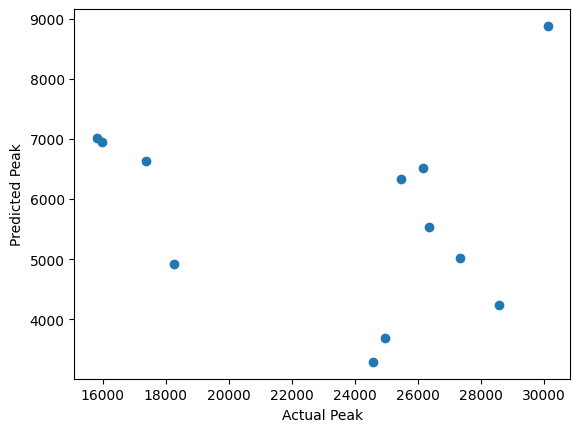

In [9]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Peak')
plt.ylabel('Predicted Peak')
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import math

def mape(test, pred):
    test, pred = np.array(test), np.array(pred)
    mape = np.mean(np.abs((test - pred) / test))
    return mape

MSE  = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
MAE  = mean_absolute_error(y_test, y_pred)
MAPE = mape(y_test, y_pred)

MSE, RMSE, MAE, MAPE

(340444993.88310266, 18451.15155981064, 17665.290624186197, 0.7416343007752326)